Pedestrian Tracking and Analysis Project Title : Pedestrian Movement Prediction and Analysis Model

Name : NIKHI PRATHISH

Organization: Entri Elevate

Overview of Problem Statement: Pedestrian tracking is essential for analyzing movement patterns and ensuring safety in public spaces. 
This project aims to track and analyze pedestrian movements using geospatial and time-series data.

Objective The main objectives of the project are: Analyze pedestrian movement patterns.
Build an ML model to predict pedestrian movements. Visualize relationships among features to derive insights.

Data Description Source: UCI Machine Learning Repository

Features: oid: Pedestrian ID.timestamp: Time of data capture. x, y: Coordinates of the pedestrian. body_roll, body_pitch body_yaw: Body orientation metrics. head_roll, head_pitch head_yaw: Head orientation metrics. other_oid, other_class, other_x, other_y: Information about nearby objects and their positions.

Target variable: 'other_class', which represents different types of pedestrian interactions. It is a categorical variable with multiple classes, such as 'crossing,' 'waiting,' or 'walking.' We use label encoding to convert it into a numerical format and analyze its distribution to ensure balanced training data. 

The goal of our model is to predict this interaction type based on movement patterns, timestamps, and other spatial features." Data Collection The dataset is pre-collected and contains spatial, temporal, and orientation-related features. Data Collection

In [7]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest, f_regression, RFE
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import joblib
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report,confusion_matrix

In [9]:
## Loading dataset 
data = pd.read_csv('pedastrain _track .csv')

In [11]:
# Dataframe
df = pd.DataFrame(data)
df

,oid,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw,other_oid,other_class,other_x,other_y
0,50187,1842.4,495854.6403,5405750.912,NaN,NaN,NaN,NaN,NaN,NaN,"[47646, 50181, 50184, 50187]","[0, 4, 4, 4]","[495923.373133135, 495899.069769386, 495899.05...","[5405744.32136751, 5405738.47595118, 5405739.1..."
1,50187,1842.5,495854.7921,5405750.939,NaN,NaN,NaN,NaN,NaN,NaN,"[50181, 50187, 50184, 47646]","[4, 4, 4, 0]","[495899.234566716, 495854.792078353, 495899.22...","[5405738.39126416, 5405750.93930797, 5405739.2..."
2,50187,1842.6,495854.9438,5405750.966,NaN,NaN,NaN,NaN,NaN,NaN,"[47646, 50187, 50184, 50181]","[0, 4, 4, 4]","[495921.779445452, 495854.943847121, 495899.35...","[5405744.51929698, 5405750.96626812, 5405739.1..."
3,50187,1842.7,495855.0956,5405750.993,NaN,NaN,NaN,NaN,NaN,NaN,"[50187, 47646, 50184, 50181]","[4, 0, 4, 4]","[495855.09561589, 495920.943052671, 495899.490...","[5405750.99322827, 5405744.63008031, 5405739.1..."
4,50187,1842.8,495855.2569,5405751.022,NaN,NaN,NaN,NaN,NaN,NaN,"[50187, 50184, 50181, 47646]","[4, 4, 4, 0]","[495855.256935427, 495899.585908147, 495899.72...","[5405751.02150176, 5405739.0332702, 5405738.08..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4754,39406,694.2,496244.5401,5406055.865,NaN,NaN,NaN,NaN,NaN,NaN,"[39406, 38509, 39402, 39414, 39415, 39416]","[4, 0, 3, 3, 1, 3]","[496244.54009617, 496227.152782719, 496217.565...","[5406055.86543169, 5406069.02898164, 5406073.3..."
4755,39406,694.3,496244.6329,5406055.854,NaN,NaN,NaN,NaN,NaN,NaN,"[39416, 39406, 39415, 39402, 39414, 38509]","[3, 4, 1, 3, 3, 0]","[496213.205162677, 496244.63289458, 496208.076...","[5406066.94295635, 5406055.85444835, 5406071.5..."
4756,39406,694.4,496244.7329,5406055.847,NaN,NaN,NaN,NaN,NaN,NaN,"[38509, 39414, 39415, 39416, 39406, 39402]","[0, 3, 1, 3, 4, 3]","[496227.152782719, 496206.206044983, 496208.70...","[5406069.02898164, 5406068.88933245, 5406071.2..."
4757,39406,694.5,496244.8396,5406055.840,NaN,NaN,NaN,NaN,NaN,NaN,"[39415, 38509, 39402, 39406, 39414, 39416]","[1, 0, 3, 4, 3, 3]","[496209.35021584, 496227.152782719, 496217.590...","[5406070.75167456, 5406069.02898164, 5406073.4..."


In [13]:
# Dataframe
df = pd.DataFrame(data)
df

,oid,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw,other_oid,other_class,other_x,other_y
0,50187,1842.4,495854.6403,5405750.912,NaN,NaN,NaN,NaN,NaN,NaN,"[47646, 50181, 50184, 50187]","[0, 4, 4, 4]","[495923.373133135, 495899.069769386, 495899.05...","[5405744.32136751, 5405738.47595118, 5405739.1..."
1,50187,1842.5,495854.7921,5405750.939,NaN,NaN,NaN,NaN,NaN,NaN,"[50181, 50187, 50184, 47646]","[4, 4, 4, 0]","[495899.234566716, 495854.792078353, 495899.22...","[5405738.39126416, 5405750.93930797, 5405739.2..."
2,50187,1842.6,495854.9438,5405750.966,NaN,NaN,NaN,NaN,NaN,NaN,"[47646, 50187, 50184, 50181]","[0, 4, 4, 4]","[495921.779445452, 495854.943847121, 495899.35...","[5405744.51929698, 5405750.96626812, 5405739.1..."
3,50187,1842.7,495855.0956,5405750.993,NaN,NaN,NaN,NaN,NaN,NaN,"[50187, 47646, 50184, 50181]","[4, 0, 4, 4]","[495855.09561589, 495920.943052671, 495899.490...","[5405750.99322827, 5405744.63008031, 5405739.1..."
4,50187,1842.8,495855.2569,5405751.022,NaN,NaN,NaN,NaN,NaN,NaN,"[50187, 50184, 50181, 47646]","[4, 4, 4, 0]","[495855.256935427, 495899.585908147, 495899.72...","[5405751.02150176, 5405739.0332702, 5405738.08..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4754,39406,694.2,496244.5401,5406055.865,NaN,NaN,NaN,NaN,NaN,NaN,"[39406, 38509, 39402, 39414, 39415, 39416]","[4, 0, 3, 3, 1, 3]","[496244.54009617, 496227.152782719, 496217.565...","[5406055.86543169, 5406069.02898164, 5406073.3..."
4755,39406,694.3,496244.6329,5406055.854,NaN,NaN,NaN,NaN,NaN,NaN,"[39416, 39406, 39415, 39402, 39414, 38509]","[3, 4, 1, 3, 3, 0]","[496213.205162677, 496244.63289458, 496208.076...","[5406066.94295635, 5406055.85444835, 5406071.5..."
4756,39406,694.4,496244.7329,5406055.847,NaN,NaN,NaN,NaN,NaN,NaN,"[38509, 39414, 39415, 39416, 39406, 39402]","[0, 3, 1, 3, 4, 3]","[496227.152782719, 496206.206044983, 496208.70...","[5406069.02898164, 5406068.88933245, 5406071.2..."
4757,39406,694.5,496244.8396,5406055.840,NaN,NaN,NaN,NaN,NaN,NaN,"[39415, 38509, 39402, 39406, 39414, 39416]","[1, 0, 3, 4, 3, 3]","[496209.35021584, 496227.152782719, 496217.590...","[5406070.75167456, 5406069.02898164, 5406073.4..."


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4759 entries, 0 to 4758
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   oid          4759 non-null   int64  
 1   timestamp    4759 non-null   float64
 2   x            4759 non-null   float64
 3   y            4759 non-null   float64
 4   body_roll    2061 non-null   float64
 5   body_pitch   2061 non-null   float64
 6   body_yaw     2061 non-null   float64
 7   head_roll    2061 non-null   float64
 8   head_pitch   2061 non-null   float64
 9   head_yaw     2061 non-null   float64
 10  other_oid    4759 non-null   object 
 11  other_class  4759 non-null   object 
 12  other_x      4759 non-null   object 
 13  other_y      4759 non-null   object 
dtypes: float64(9), int64(1), object(4)
memory usage: 520.6+ KB


In [17]:
data.shape

(4759, 14)

In [19]:
# Convert 'None' values to NaN for proper handling
df.replace('None', np.nan, inplace=True)

In [21]:
#Convert list columns to usable features (take first element as an example)
df['other_class'] = df['other_class'].apply(lambda x: eval(x)[0] if isinstance(x, str) else x)
df['other_x'] = df['other_x'].apply(lambda x: eval(x)[0] if isinstance(x, str) else x)
df['other_y'] = df['other_y'].apply(lambda x: eval(x)[0] if isinstance(x, str) else x)

In [23]:
data.duplicated().sum()

0

In [25]:
print(df.dtypes)

oid              int64
timestamp      float64
x              float64
y              float64
body_roll      float64
body_pitch     float64
body_yaw       float64
head_roll      float64
head_pitch     float64
head_yaw       float64
other_oid       object
other_class      int64
other_x        float64
other_y        float64
dtype: object


In [27]:
print(df.columns)

Index(['oid', 'timestamp', 'x', 'y', 'body_roll', 'body_pitch', 'body_yaw',
       'head_roll', 'head_pitch', 'head_yaw', 'other_oid', 'other_class',
       'other_x', 'other_y'],
      dtype='object')


In [29]:
df.columns = df.columns.str.strip()

In [31]:
for col in df.columns:
    if df[col].dtype == 'object':  # Non-numeric columns
        print(f"Column '{col}' contains non-numeric data.")
        print(df[col].head())

Column 'other_oid' contains non-numeric data.
0    [47646, 50181, 50184, 50187]
1    [50181, 50187, 50184, 47646]
2    [47646, 50187, 50184, 50181]
3    [50187, 47646, 50184, 50181]
4    [50187, 50184, 50181, 47646]
Name: other_oid, dtype: object


In [33]:
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, list)).any():
        print(f"Column '{col}' contains lists.")

In [35]:
import ast

def convert_to_list(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else x
    except:
        return x  # Leave it as is if conversion fails

df = df.applymap(convert_to_list)


In [37]:
df['list_length'] = df['other_oid'].apply(lambda x: len(x) if isinstance(x, list) else np.nan)
df['first_value'] = df['other_oid'].apply(lambda x: x[0] if isinstance(x, list) else np.nan)
df['mean_value'] = df['other_oid'].apply(lambda x: np.mean(x) if isinstance(x, list) else np.nan)


In [39]:
df

,oid,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw,other_oid,other_class,other_x,other_y,list_length,first_value,mean_value
0,50187,1842.4,495854.6403,5405750.912,NaN,NaN,NaN,NaN,NaN,NaN,"[47646, 50181, 50184, 50187]",0,495923.373133,5.405744e+06,4,47646,49549.500000
1,50187,1842.5,495854.7921,5405750.939,NaN,NaN,NaN,NaN,NaN,NaN,"[50181, 50187, 50184, 47646]",4,495899.234567,5.405738e+06,4,50181,49549.500000
2,50187,1842.6,495854.9438,5405750.966,NaN,NaN,NaN,NaN,NaN,NaN,"[47646, 50187, 50184, 50181]",0,495921.779445,5.405745e+06,4,47646,49549.500000
3,50187,1842.7,495855.0956,5405750.993,NaN,NaN,NaN,NaN,NaN,NaN,"[50187, 47646, 50184, 50181]",4,495855.095616,5.405751e+06,4,50187,49549.500000
4,50187,1842.8,495855.2569,5405751.022,NaN,NaN,NaN,NaN,NaN,NaN,"[50187, 50184, 50181, 47646]",4,495855.256935,5.405751e+06,4,50187,49549.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4754,39406,694.2,496244.5401,5406055.865,NaN,NaN,NaN,NaN,NaN,NaN,"[39406, 38509, 39402, 39414, 39415, 39416]",4,496244.540096,5.406056e+06,6,39406,39260.333333
4755,39406,694.3,496244.6329,5406055.854,NaN,NaN,NaN,NaN,NaN,NaN,"[39416, 39406, 39415, 39402, 39414, 38509]",3,496213.205163,5.406067e+06,6,39416,39260.333333
4756,39406,694.4,496244.7329,5406055.847,NaN,NaN,NaN,NaN,NaN,NaN,"[38509, 39414, 39415, 39416, 39406, 39402]",0,496227.152783,5.406069e+06,6,38509,39260.333333
4757,39406,694.5,496244.8396,5406055.840,NaN,NaN,NaN,NaN,NaN,NaN,"[39415, 38509, 39402, 39406, 39414, 39416]",1,496209.350216,5.406071e+06,6,39415,39260.333333


In [41]:
import ast

def convert_to_list(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else x
    except:
        return x  # Leave as is if conversion fails

# Apply only to object (string-based) columns
df = df.apply(lambda col: col.map(convert_to_list) if col.dtype == "object" else col)

In [43]:
column_name = "other_oid"  # Replace with the correct column name

df['list_length'] = df[column_name].apply(lambda x: len(x) if isinstance(x, list) else np.nan)
df['first_value'] = df[column_name].apply(lambda x: x[0] if isinstance(x, list) else np.nan)
df['mean_value'] = df[column_name].apply(lambda x: np.mean(x) if isinstance(x, list) else np.nan)


In [45]:
print(df[column_name].apply(type).value_counts())


other_oid
<class 'list'>    4759
Name: count, dtype: int64


In [47]:
df

,oid,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw,other_oid,other_class,other_x,other_y,list_length,first_value,mean_value
0,50187,1842.4,495854.6403,5405750.912,NaN,NaN,NaN,NaN,NaN,NaN,"[47646, 50181, 50184, 50187]",0,495923.373133,5.405744e+06,4,47646,49549.500000
1,50187,1842.5,495854.7921,5405750.939,NaN,NaN,NaN,NaN,NaN,NaN,"[50181, 50187, 50184, 47646]",4,495899.234567,5.405738e+06,4,50181,49549.500000
2,50187,1842.6,495854.9438,5405750.966,NaN,NaN,NaN,NaN,NaN,NaN,"[47646, 50187, 50184, 50181]",0,495921.779445,5.405745e+06,4,47646,49549.500000
3,50187,1842.7,495855.0956,5405750.993,NaN,NaN,NaN,NaN,NaN,NaN,"[50187, 47646, 50184, 50181]",4,495855.095616,5.405751e+06,4,50187,49549.500000
4,50187,1842.8,495855.2569,5405751.022,NaN,NaN,NaN,NaN,NaN,NaN,"[50187, 50184, 50181, 47646]",4,495855.256935,5.405751e+06,4,50187,49549.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4754,39406,694.2,496244.5401,5406055.865,NaN,NaN,NaN,NaN,NaN,NaN,"[39406, 38509, 39402, 39414, 39415, 39416]",4,496244.540096,5.406056e+06,6,39406,39260.333333
4755,39406,694.3,496244.6329,5406055.854,NaN,NaN,NaN,NaN,NaN,NaN,"[39416, 39406, 39415, 39402, 39414, 38509]",3,496213.205163,5.406067e+06,6,39416,39260.333333
4756,39406,694.4,496244.7329,5406055.847,NaN,NaN,NaN,NaN,NaN,NaN,"[38509, 39414, 39415, 39416, 39406, 39402]",0,496227.152783,5.406069e+06,6,38509,39260.333333
4757,39406,694.5,496244.8396,5406055.840,NaN,NaN,NaN,NaN,NaN,NaN,"[39415, 38509, 39402, 39406, 39414, 39416]",1,496209.350216,5.406071e+06,6,39415,39260.333333


In [49]:
column_name = "other_oid"  # Replace with actual column name
print(df[column_name].apply(type).value_counts())


other_oid
<class 'list'>    4759
Name: count, dtype: int64


In [51]:
import ast

def convert_to_list(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else x
    except:
        return x  # Return as-is if conversion fails

df[column_name] = df[column_name].apply(convert_to_list)


In [53]:
import itertools

df[column_name] = df[column_name].apply(lambda x: list(itertools.chain(*x)) if isinstance(x, list) and any(isinstance(i, list) for i in x) else x)

In [55]:
import numpy as np

df['list_length'] = df[column_name].apply(lambda x: len(x) if isinstance(x, list) else np.nan)
df['first_value'] = df[column_name].apply(lambda x: x[0] if isinstance(x, list) else np.nan)
df['mean_value'] = df[column_name].apply(lambda x: np.mean(x) if isinstance(x, list) else np.nan)


In [57]:
print(df[[column_name, 'list_length', 'first_value', 'mean_value']].head())

                      other_oid  list_length  first_value  mean_value
0  [47646, 50181, 50184, 50187]            4        47646     49549.5
1  [50181, 50187, 50184, 47646]            4        50181     49549.5
2  [47646, 50187, 50184, 50181]            4        47646     49549.5
3  [50187, 47646, 50184, 50181]            4        50187     49549.5
4  [50187, 50184, 50181, 47646]            4        50187     49549.5


In [59]:
df["other_oid"] = df[column_name].apply(lambda x: np.mean(x) if isinstance(x, list) else x)

In [61]:
print(df.columns)

Index(['oid', 'timestamp', 'x', 'y', 'body_roll', 'body_pitch', 'body_yaw',
       'head_roll', 'head_pitch', 'head_yaw', 'other_oid', 'other_class',
       'other_x', 'other_y', 'list_length', 'first_value', 'mean_value'],
      dtype='object')


In [63]:
print(df[column_name].apply(type).value_counts())

other_oid
<class 'float'>    4759
Name: count, dtype: int64


In [65]:
import numpy as np
import ast

# Convert string representations of lists into actual lists
df[column_name] = df[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Create a new column with the mean of lists
df["other_oid"] = df[column_name].apply(lambda x: np.mean(x) if isinstance(x, list) else x)

# Check the first few rows
print(df.head())


     oid  timestamp            x            y  body_roll  body_pitch  \
0  50187     1842.4  495854.6403  5405750.912        NaN         NaN   
1  50187     1842.5  495854.7921  5405750.939        NaN         NaN   
2  50187     1842.6  495854.9438  5405750.966        NaN         NaN   
3  50187     1842.7  495855.0956  5405750.993        NaN         NaN   
4  50187     1842.8  495855.2569  5405751.022        NaN         NaN   

   body_yaw  head_roll  head_pitch  head_yaw  other_oid  other_class  \
0       NaN        NaN         NaN       NaN    49549.5            0   
1       NaN        NaN         NaN       NaN    49549.5            4   
2       NaN        NaN         NaN       NaN    49549.5            0   
3       NaN        NaN         NaN       NaN    49549.5            4   
4       NaN        NaN         NaN       NaN    49549.5            4   

         other_x       other_y  list_length  first_value  mean_value  
0  495923.373133  5.405744e+06            4        47646     49

In [67]:
# Fill missing values with median
df.fillna(df.median(), inplace=True)

In [71]:
# Display summary statistics
print(df.describe())

                oid    timestamp              x             y    body_roll  \
count   4759.000000  4759.000000    4759.000000  4.759000e+03  4759.000000   
mean   36158.947258  1169.678924  496070.834761  5.405964e+06     0.131661   
std    15992.323879   800.496866     109.830019  1.763856e+02     0.909294   
min     7682.000000   217.500000  495813.501700  5.405731e+06    -7.000000   
25%    19348.000000   317.500000  496008.570300  5.405741e+06     0.000000   
50%    42054.000000   925.400000  496062.816700  5.406074e+06     0.000000   
75%    49654.000000  1837.850000  496157.493300  5.406116e+06     0.000000   
max    50943.000000  2650.800000  496331.271300  5.406147e+06    10.800000   

        body_pitch    body_yaw    head_roll   head_pitch     head_yaw  \
count  4759.000000  4759.00000  4759.000000  4759.000000  4759.000000   
mean     -0.308270   191.37642    -0.109919    -0.470370   185.982897   
std       1.530334    52.97281     2.315212     3.762937    51.216930   
min  

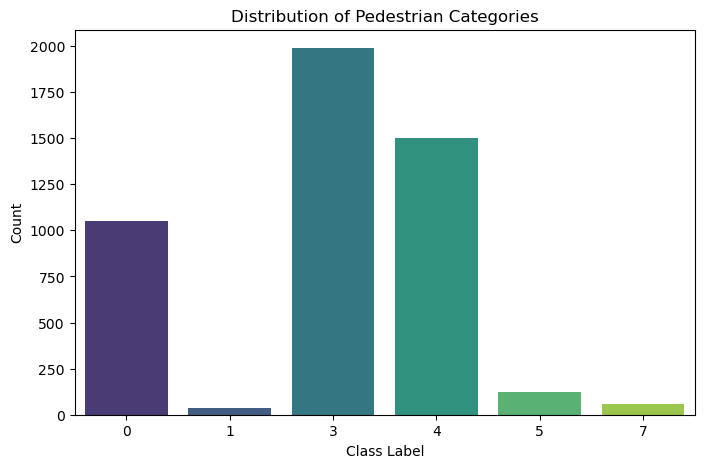

In [73]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['other_class'], palette="viridis")
plt.title("Distribution of Pedestrian Categories")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

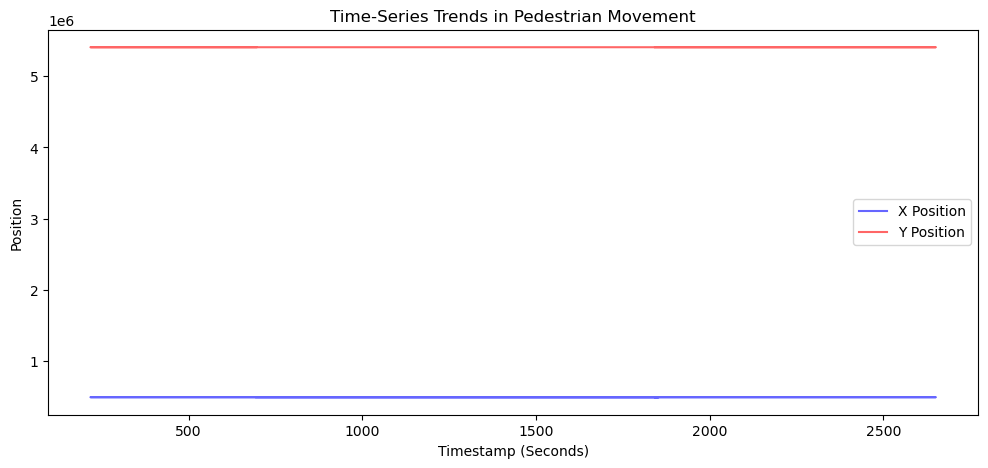

In [75]:
plt.figure(figsize=(12, 5))
plt.plot(df['timestamp'], df['x'], label='X Position', color='blue', alpha=0.6)
plt.plot(df['timestamp'], df['y'], label='Y Position', color='red', alpha=0.6)
plt.xlabel("Timestamp (Seconds)")
plt.ylabel("Position")
plt.title("Time-Series Trends in Pedestrian Movement")
plt.legend()
plt.show()

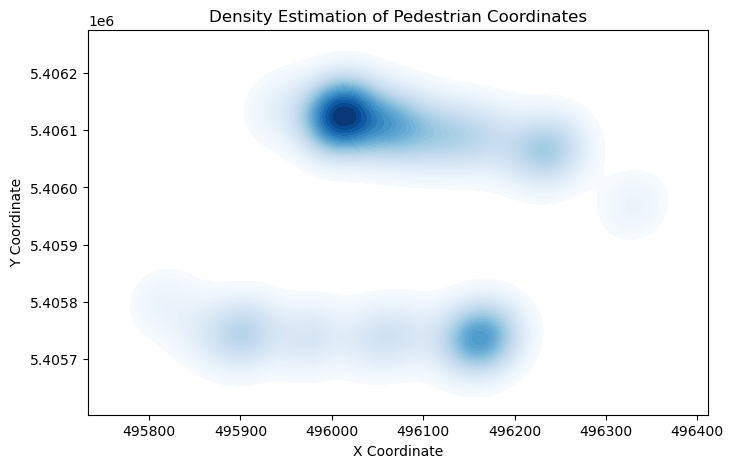

In [77]:
plt.figure(figsize=(8, 5))
sns.kdeplot(x=df['x'], y=df['y'], cmap="Blues", fill=True, levels=50)
plt.title("Density Estimation of Pedestrian Coordinates")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()


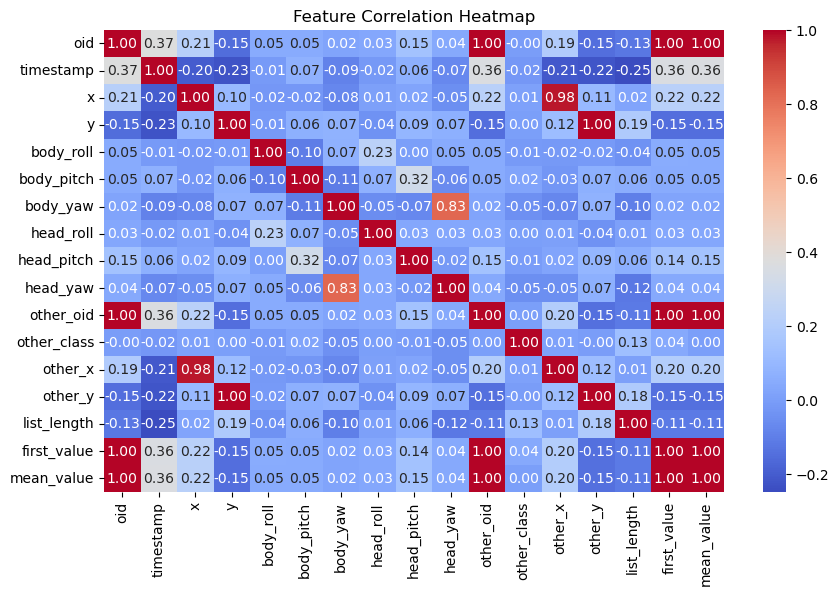

In [79]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

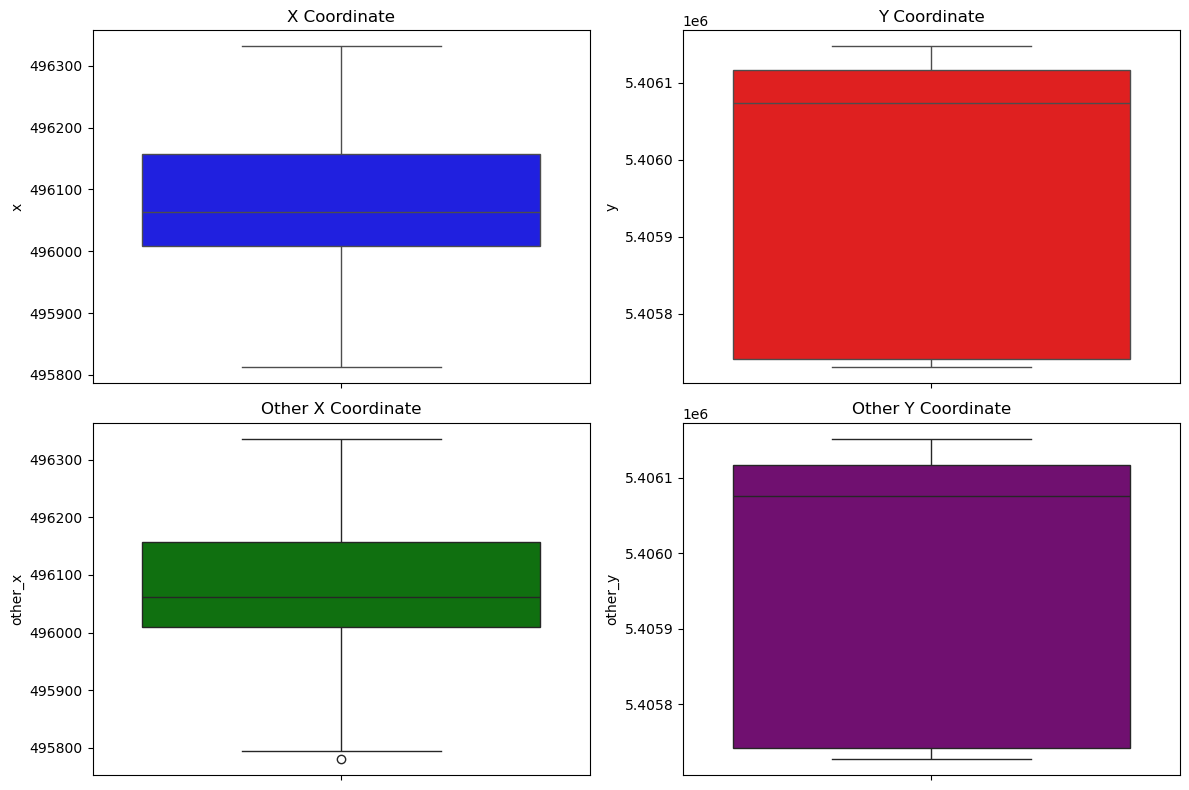

In [81]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(y=df['x'], ax=axes[0, 0], color='blue')
axes[0, 0].set_title("X Coordinate")

sns.boxplot(y=df['y'], ax=axes[0, 1], color='red')
axes[0, 1].set_title("Y Coordinate")

sns.boxplot(y=df['other_x'], ax=axes[1, 0], color='green')
axes[1, 0].set_title("Other X Coordinate")

sns.boxplot(y=df['other_y'], ax=axes[1, 1], color='purple')
axes[1, 1].set_title("Other Y Coordinate")

plt.tight_layout()
plt.show()

In [83]:
df

,oid,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw,other_oid,other_class,other_x,other_y,list_length,first_value,mean_value
0,50187,1842.4,495854.6403,5405750.912,0.0,0.0,192.0,0.0,0.0,185.687,49549.500000,0,495923.373133,5.405744e+06,4,47646,49549.500000
1,50187,1842.5,495854.7921,5405750.939,0.0,0.0,192.0,0.0,0.0,185.687,49549.500000,4,495899.234567,5.405738e+06,4,50181,49549.500000
2,50187,1842.6,495854.9438,5405750.966,0.0,0.0,192.0,0.0,0.0,185.687,49549.500000,0,495921.779445,5.405745e+06,4,47646,49549.500000
3,50187,1842.7,495855.0956,5405750.993,0.0,0.0,192.0,0.0,0.0,185.687,49549.500000,4,495855.095616,5.405751e+06,4,50187,49549.500000
4,50187,1842.8,495855.2569,5405751.022,0.0,0.0,192.0,0.0,0.0,185.687,49549.500000,4,495855.256935,5.405751e+06,4,50187,49549.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4754,39406,694.2,496244.5401,5406055.865,0.0,0.0,192.0,0.0,0.0,185.687,39260.333333,4,496244.540096,5.406056e+06,6,39406,39260.333333
4755,39406,694.3,496244.6329,5406055.854,0.0,0.0,192.0,0.0,0.0,185.687,39260.333333,3,496213.205163,5.406067e+06,6,39416,39260.333333
4756,39406,694.4,496244.7329,5406055.847,0.0,0.0,192.0,0.0,0.0,185.687,39260.333333,0,496227.152783,5.406069e+06,6,38509,39260.333333
4757,39406,694.5,496244.8396,5406055.840,0.0,0.0,192.0,0.0,0.0,185.687,39260.333333,1,496209.350216,5.406071e+06,6,39415,39260.333333


In [85]:
df.shape

(4759, 17)

In [87]:
# Encode 'other_class' (Target variable)
le = LabelEncoder()
df['other_class'] = le.fit_transform(df['other_class'])  # Converts classes into numerical values


In [89]:
# Calculate speed as the Euclidean distance moved per timestamp
df['speed'] = ((df['x'].diff())**2 + (df['y'].diff())**2)**0.5

# Calculate acceleration as the difference in speed
df['acceleration'] = df['speed'].diff()

# Calculate relative position compared to the nearest object (first 'other_x' and 'other_y' value)
df['relative_x'] = df['x'] - df['other_x']
df['relative_y'] = df['y'] - df['other_y']

# Fill NaN values caused by differencing
df.fillna(0, inplace=True)


In [91]:
df

,oid,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw,...,other_class,other_x,other_y,list_length,first_value,mean_value,speed,acceleration,relative_x,relative_y
0,50187,1842.4,495854.6403,5405750.912,0.0,0.0,192.0,0.0,0.0,185.687,...,0,495923.373133,5.405744e+06,4,47646,49549.500000,0.000000,0.000000,-68.732833,6.590632
1,50187,1842.5,495854.7921,5405750.939,0.0,0.0,192.0,0.0,0.0,185.687,...,3,495899.234567,5.405738e+06,4,50181,49549.500000,0.154182,0.000000,-44.442467,12.547736
2,50187,1842.6,495854.9438,5405750.966,0.0,0.0,192.0,0.0,0.0,185.687,...,0,495921.779445,5.405745e+06,4,47646,49549.500000,0.154084,-0.000098,-66.835645,6.446703
3,50187,1842.7,495855.0956,5405750.993,0.0,0.0,192.0,0.0,0.0,185.687,...,3,495855.095616,5.405751e+06,4,50187,49549.500000,0.154182,0.000098,-0.000016,-0.000228
4,50187,1842.8,495855.2569,5405751.022,0.0,0.0,192.0,0.0,0.0,185.687,...,3,495855.256935,5.405751e+06,4,50187,49549.500000,0.163886,0.009704,-0.000035,0.000498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4754,39406,694.2,496244.5401,5406055.865,0.0,0.0,192.0,0.0,0.0,185.687,...,3,496244.540096,5.406056e+06,6,39406,39260.333333,0.099432,-0.004325,0.000004,-0.000432
4755,39406,694.3,496244.6329,5406055.854,0.0,0.0,192.0,0.0,0.0,185.687,...,2,496213.205163,5.406067e+06,6,39416,39260.333333,0.093450,-0.005983,31.427737,-11.088956
4756,39406,694.4,496244.7329,5406055.847,0.0,0.0,192.0,0.0,0.0,185.687,...,0,496227.152783,5.406069e+06,6,38509,39260.333333,0.100245,0.006795,17.580117,-13.181982
4757,39406,694.5,496244.8396,5406055.840,0.0,0.0,192.0,0.0,0.0,185.687,...,1,496209.350216,5.406071e+06,6,39415,39260.333333,0.106929,0.006685,35.489384,-14.911675


In [93]:
# Define features and target variable
X = df[['timestamp', 'x', 'y', 'speed', 'acceleration', 'relative_x', 'relative_y',
        'body_roll', 'body_pitch', 'body_yaw', 'head_roll', 'head_pitch', 'head_yaw',
        'other_x', 'other_y']]
y = df['other_class']

In [95]:
# Fit a Random Forest model to check feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)


RandomForestClassifier(random_state=42)

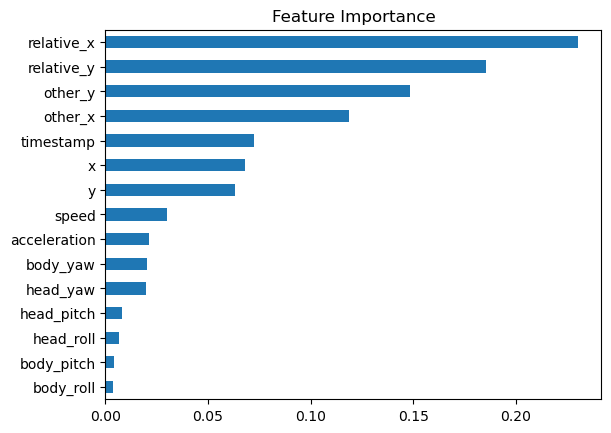

In [97]:
# Feature importance visualization
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", title="Feature Importance")
plt.show()

In [99]:
# Select the top 10 most relevant features
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Show selected feature indices
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['timestamp', 'x', 'y', 'relative_x', 'relative_y', 'body_yaw',
       'head_pitch', 'head_yaw', 'other_x', 'other_y'],
      dtype='object')


In [101]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, stratify=y, random_state=42)



In [103]:
# Display the split dataset shapes
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Testing Labels Shape: {y_test.shape}")

Training Features Shape: (3807, 10)
Testing Features Shape: (952, 10)
Training Labels Shape: (3807,)
Testing Labels Shape: (952,)


In [105]:
# Show selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())

Selected Features: ['timestamp', 'x', 'y', 'relative_x', 'relative_y', 'body_yaw', 'head_pitch', 'head_yaw', 'other_x', 'other_y']


In [107]:
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


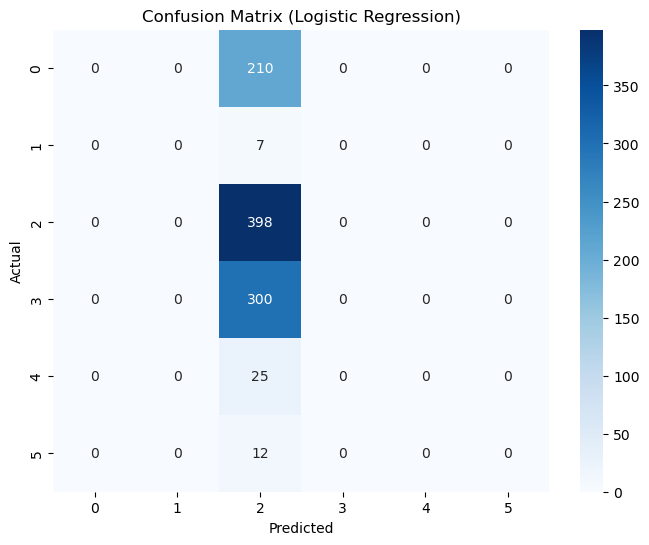

Results for Logistic Regression:
Accuracy: 0.4180672268907563
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       210
           1       0.00      0.00      0.00         7
           2       0.42      1.00      0.59       398
           3       0.00      0.00      0.00       300
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        12

    accuracy                           0.42       952
   macro avg       0.07      0.17      0.10       952
weighted avg       0.17      0.42      0.25       952

------------------------------


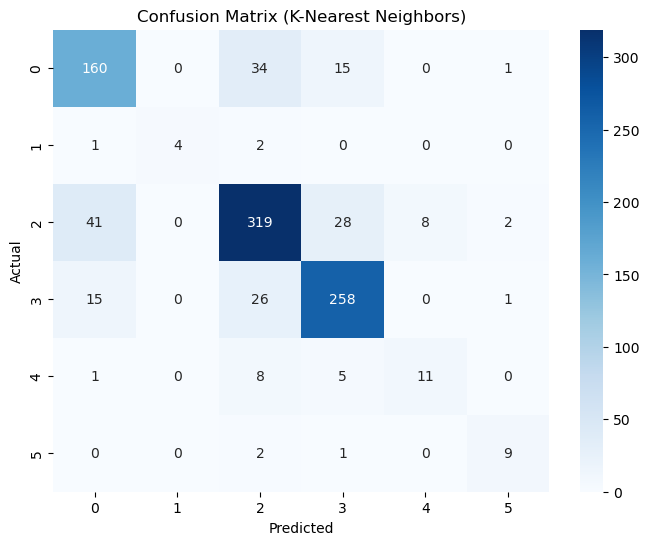

Results for K-Nearest Neighbors:
Accuracy: 0.7993697478991597
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       210
           1       1.00      0.57      0.73         7
           2       0.82      0.80      0.81       398
           3       0.84      0.86      0.85       300
           4       0.58      0.44      0.50        25
           5       0.69      0.75      0.72        12

    accuracy                           0.80       952
   macro avg       0.78      0.70      0.73       952
weighted avg       0.80      0.80      0.80       952

------------------------------


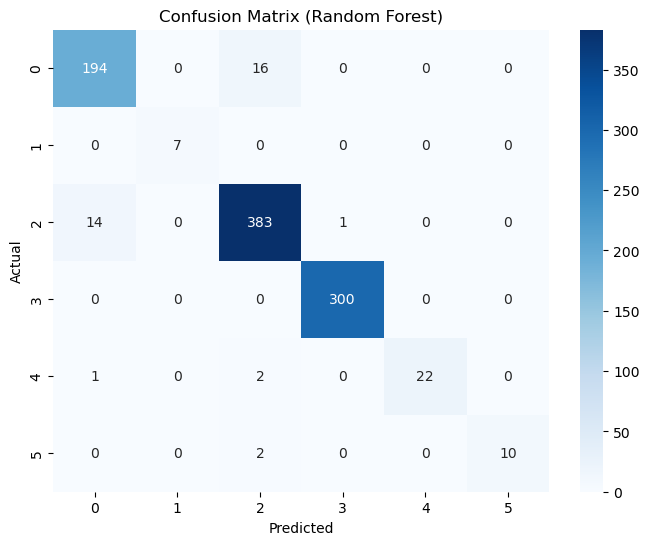

Results for Random Forest:
Accuracy: 0.9621848739495799
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       210
           1       1.00      1.00      1.00         7
           2       0.95      0.96      0.96       398
           3       1.00      1.00      1.00       300
           4       1.00      0.88      0.94        25
           5       1.00      0.83      0.91        12

    accuracy                           0.96       952
   macro avg       0.98      0.93      0.95       952
weighted avg       0.96      0.96      0.96       952

------------------------------


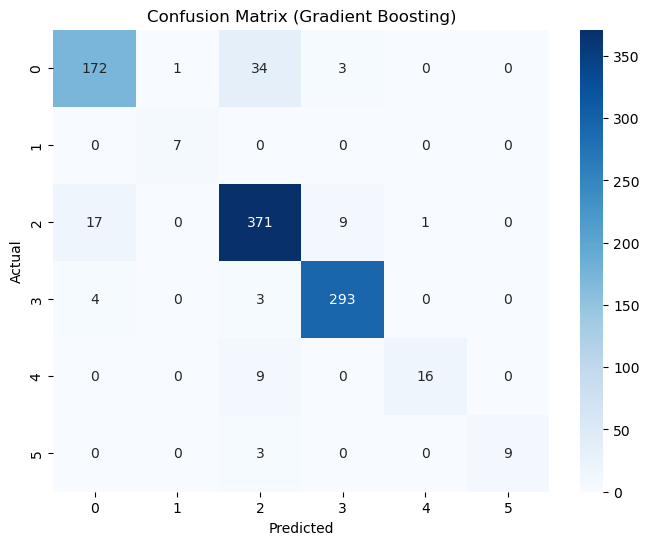

Results for Gradient Boosting:
Accuracy: 0.9117647058823529
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       210
           1       0.88      1.00      0.93         7
           2       0.88      0.93      0.91       398
           3       0.96      0.98      0.97       300
           4       0.94      0.64      0.76        25
           5       1.00      0.75      0.86        12

    accuracy                           0.91       952
   macro avg       0.93      0.85      0.88       952
weighted avg       0.91      0.91      0.91       952

------------------------------


In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
}

results = {}
for model_name, model in models.items():
    model.fit(X_train_selected, y_train)  # Use selected features
    y_pred = model.predict(X_test_selected) # Use selected features
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    results[model_name] = {
        "Accuracy": accuracy,
        "Confusion Matrix": cm,
        "Classification Report": cr
    }

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix ({model_name})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Print results
    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{cr}")
    print("-" * 30)
     

In [111]:
best_model_name = max(results, key=lambda k: results[k]["Accuracy"])
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with accuracy {results[best_model_name]['Accuracy']}")


Best Model: Random Forest with accuracy 0.9621848739495799


In [113]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Example pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handles missing values
    ('scaler', StandardScaler()),  # Feature scaling
    ('model', RandomForestClassifier())  # ML model
])



In [115]:
# Fit the pipeline with training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', RandomForestClassifier())])

In [117]:
# Now predict on test data
y_pred = pipeline.predict(X_test)

In [119]:
import joblib

In [121]:
joblib.dump(Pipeline,'Random_forest_pipeline.joblib')

['Random_forest_pipeline.joblib']

In [123]:
loaded_Pipeline =joblib.load('Random_forest_pipeline.joblib')